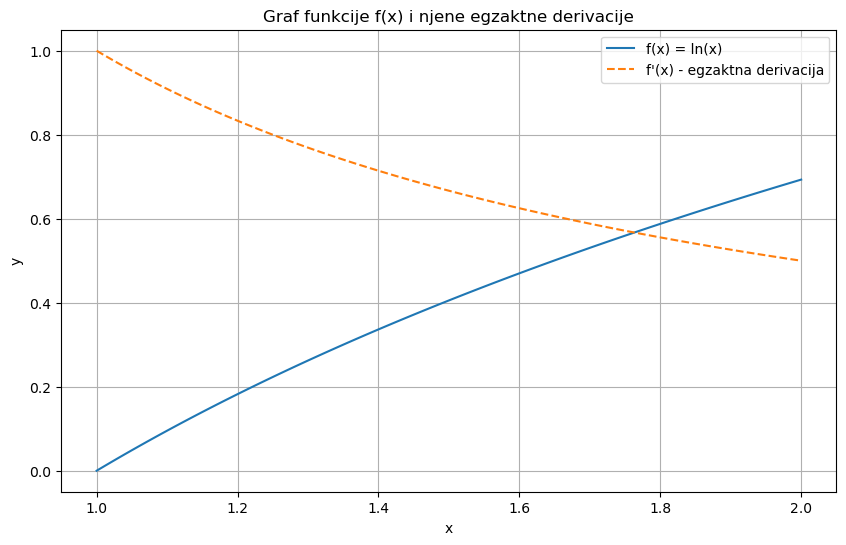

In [7]:
# 1 a) b) 

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log(x)

def f_derivative(x):
    return 1 / x

x_values = np.linspace(1, 2, 100)
y_values = f(x_values)
derivative_values = f_derivative(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = ln(x)')
plt.plot(x_values, derivative_values, label="f'(x) - egzaktna derivacija", linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graf funkcije f(x) i njene egzaktne derivacije')
plt.legend()
plt.grid(True)
plt.show()



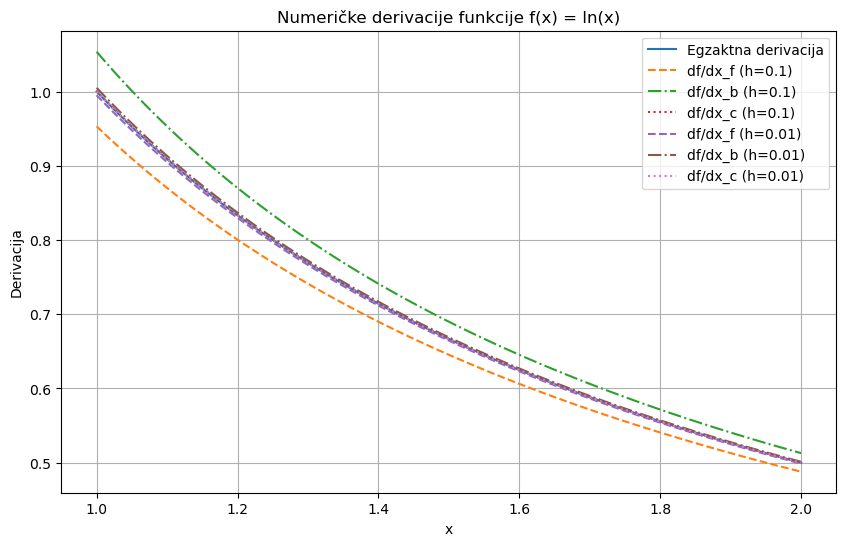

In [11]:
# 1 a) i b) 
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log(x)

def f_derivative(x):
    return 1 / x

def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    return (f(x + h/2) - f(x - h/2)) / h

x_values = np.linspace(1, 2, 100)
h_values = [0.1, 0.01]

exact_derivative = f_derivative(x_values)

numerical_derivatives_forward = [forward_difference(f, x_values, h) for h in h_values]
numerical_derivatives_backward = [backward_difference(f, x_values, h) for h in h_values]
numerical_derivatives_central = [central_difference(f, x_values, h) for h in h_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, exact_derivative, label="Egzaktna derivacija", linestyle='-')
for i, h in enumerate(h_values):
    plt.plot(x_values, numerical_derivatives_forward[i], label=f"df/dx_f (h={h})", linestyle='--')
    plt.plot(x_values, numerical_derivatives_backward[i], label=f"df/dx_b (h={h})", linestyle='-.')
    plt.plot(x_values, numerical_derivatives_central[i], label=f"df/dx_c (h={h})", linestyle=':')
plt.xlabel('x')
plt.ylabel('Derivacija')
plt.title('Numeričke derivacije funkcije f(x) = ln(x)')
plt.legend()
plt.grid(True)
plt.show()



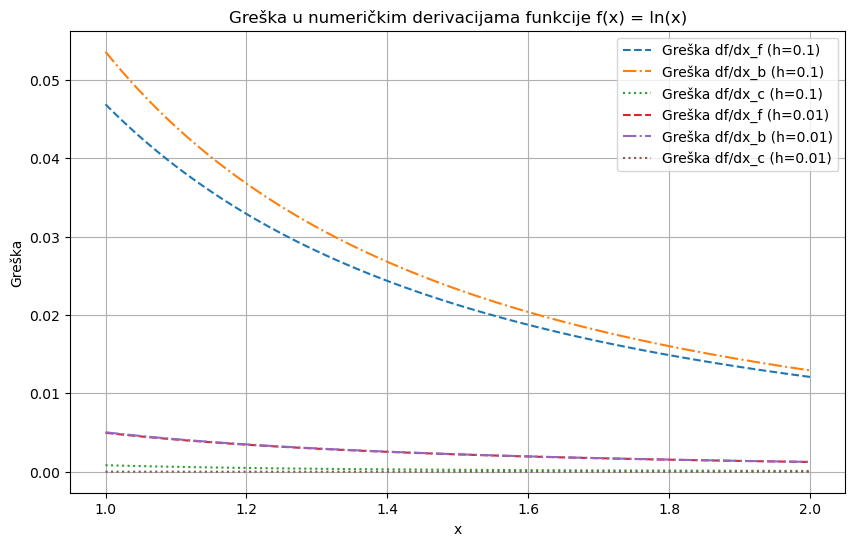

In [12]:
#1 c)
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log(x)

def f_derivative(x):
    return 1 / x

def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    return (f(x + h/2) - f(x - h/2)) / h

x_values = np.linspace(1, 2, 100)
h_values = [0.1, 0.01]

exact_derivative = f_derivative(x_values)

numerical_derivatives_forward = [forward_difference(f, x_values, h) for h in h_values]
numerical_derivatives_backward = [backward_difference(f, x_values, h) for h in h_values]
numerical_derivatives_central = [central_difference(f, x_values, h) for h in h_values]

errors_forward = [np.abs(exact_derivative - num_deriv) for num_deriv in numerical_derivatives_forward]
errors_backward = [np.abs(exact_derivative - num_deriv) for num_deriv in numerical_derivatives_backward]
errors_central = [np.abs(exact_derivative - num_deriv) for num_deriv in numerical_derivatives_central]

plt.figure(figsize=(10, 6))

for i, h in enumerate(h_values):
    plt.plot(x_values, errors_forward[i], label=f"Greška df/dx_f (h={h})", linestyle='--')
    plt.plot(x_values, errors_backward[i], label=f"Greška df/dx_b (h={h})", linestyle='-.')
    plt.plot(x_values, errors_central[i], label=f"Greška df/dx_c (h={h})", linestyle=':')

plt.xlabel('x')
plt.ylabel('Greška')
plt.title('Greška u numeričkim derivacijama funkcije f(x) = ln(x)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
#2 a) b ) 
import numpy as np

def f(x):
    return 1 / x

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2.0
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0
    for i in range(n):
        integral += f(a + (i + 0.5) * h)
    integral *= h
    return integral

def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    integral = f(a) + f(b)
    for i in range(1, n, 2):
        integral += 4 * f(a + i * h)
    for i in range(2, n - 1, 2):
        integral += 2 * f(a + i * h)
    integral *= h / 3
    return integral

epsilon = 1e-4
true_value = np.log(3) - np.log(1)

def calculate_integral(method, f, a, b, epsilon, true_value):
    n = 1
    integral = method(f, a, b, n)
    while abs(integral - true_value) > epsilon:
        n *= 2
        integral = method(f, a, b, n)
    return integral, n

a, b = 1, 3

integral_trapezoidal, n_trapezoidal = calculate_integral(trapezoidal_rule, f, a, b, epsilon, true_value)
print(f"Trapezna metoda: Integral = {integral_trapezoidal}, Broj točaka = {n_trapezoidal}")

integral_midpoint, n_midpoint = calculate_integral(midpoint_rule, f, a, b, epsilon, true_value)
print(f"Metoda središnje točke: Integral = {integral_midpoint}, Broj točaka = {n_midpoint}")

integral_simpson, n_simpson = calculate_integral(simpson_rule, f, a, b, epsilon, true_value)
print(f"Simpsonova metoda: Integral = {integral_simpson}, Broj točaka = {n_simpson}")

exact_value = np.log(3)
print(f"Egzaktna vrijednost integrala: {exact_value}")

print(f"Trapezna metoda - Razlika: {abs(integral_trapezoidal - exact_value)}")
print(f"Metoda središnje točke - Razlika: {abs(integral_midpoint - exact_value)}")
print(f"Simpsonova metoda - Razlika: {abs(integral_simpson - exact_value)}")



Trapezna metoda: Integral = 1.0986846187855877, Broj točaka = 64
Metoda središnje točke: Integral = 1.0985761265510816, Broj točaka = 64
Simpsonova metoda: Integral = 1.0986200426804813, Broj točaka = 16
Egzaktna vrijednost integrala: 1.0986122886681098
Trapezna metoda - Razlika: 7.23301174778701e-05
Metoda središnje točke - Razlika: 3.616211702817118e-05
Simpsonova metoda - Razlika: 7.754012371519181e-06
